In [1]:
def to_rad(deg):
    return deg * (np.pi / 180)

def to_deg(rad):
    return rad / (np.pi / 180)

import matplotlib.pyplot as plt
import numpy             as np

import csv
import mpld3
mpld3.enable_notebook()
%matplotlib inline

In [2]:
def read_csv(path):
    '''
    '''

    x_list = np.array([])
    y_list = np.array([])
    counter  = 0
    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            counter += 1
            x = row[0]
            y = row[1]
            x_list = np.append(x_list, x)
            y_list = np.append(y_list, y)           
    return x_list, y_list

In [3]:
normal_x_list, normal_y_list = read_csv('../../build/normal-yaw-pos.csv')

In [5]:
steer_x_list, steer_y_list = read_csv('../../build/steering-yaw-pos.csv')

In [ ]:
kafi_x_list, kafi_y_list = read_csv('../../build/kafi-yaw-pos.csv')

/home/rewrite/.anaconda3/envs/slam-examples/lib/python2.7/site-packages/mpld3/mplexporter/exporter.py:171: UserWarning: Legend element <matplotlib.collections.PathCollection object at 0x7f827c26c050> not impemented
  warnings.warn("Legend element %s not impemented" % child)
/home/rewrite/.anaconda3/envs/slam-examples/lib/python2.7/site-packages/mpld3/mplexporter/exporter.py:171: UserWarning: Legend element <matplotlib.collections.PathCollection object at 0x7f827c26c4d0> not impemented
  warnings.warn("Legend element %s not impemented" % child)


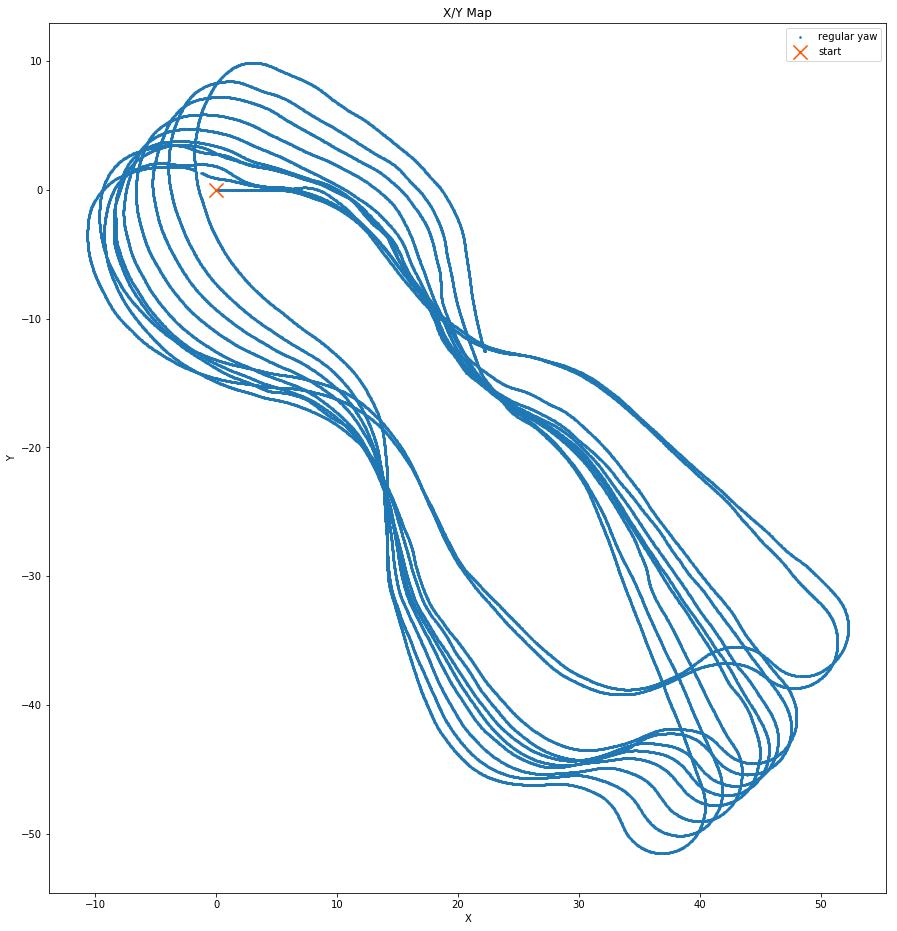

In [4]:
# kafi_x_list, kafi_y_list = read_csv('../../build/kafi-yaw-pos.csv')
fig, ax = plt.subplots(figsize=(15,16))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("X/Y Map")

cut = 100000

ax.scatter(normal_x_list[:cut], normal_y_list[:cut], s = 2.5, label = 'regular yaw')
# ax.scatter(steer_x_list[:cut], steer_y_list[:cut], s = 2.5, color = 'red', label = 'steering calc. yaw')
#ax.scatter(kafi_x_list[:cut], kafi_y_list[:cut], s = 2.5, color = 'green', label = 'kafi calc. yaw')

ax.scatter(normal_x_list[:1], normal_y_list[:1], s = 200, label = 'start', color = '#FF5500', marker='x')
# ax.scatter(test_x_list[:cut], test_y_list[:cut], s = 2.5, label = 'regular yaw')

#ax.set_xticks(np.arange(-10, 35, 1))
#ax.set_yticks(np.arange(-30, 5, 1))
#ax.grid()
plt.legend()
plt.show()

In [79]:
def read_csv(path):
    '''
    '''

    #normal_yaw_list = np.array([])
    steer_yaw_list = np.array([])
    kafi_yaw_list = np.array([])
    
    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            #normal_yaw = row[0]
            steer_yaw  = row[1]
            kafi_yaw   = row[0]
            #normal_yaw_list = np.append(normal_yaw_list, normal_yaw)
            steer_yaw_list = np.append(steer_yaw_list, steer_yaw)
            kafi_yaw_list = np.append(kafi_yaw_list, kafi_yaw)
            
    #return normal_yaw_list, steer_yaw_list, kafi_yaw_list
    return kafi_yaw_list, steer_yaw_list


# normal_yaw_list, steer_yaw_list, kafi_yaw_list, bla_list = read_csv('../../build/pose.csv')
kafi_yaw_list, steer_yaw_list = read_csv('../../build/yaws.csv')

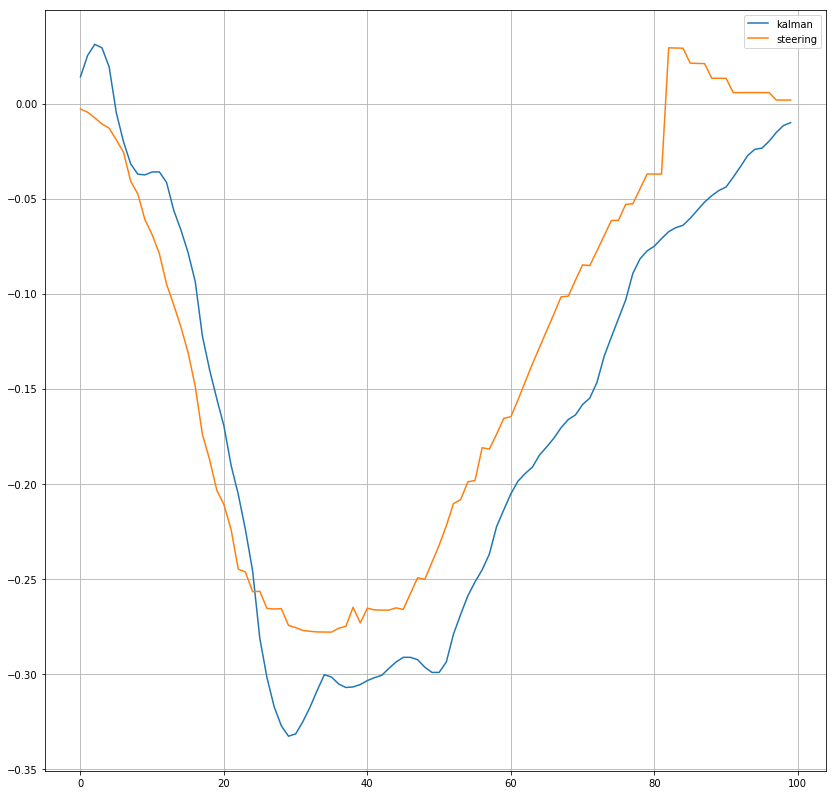

In [80]:
fig, ax = plt.subplots(figsize=(14,14))

#ax.set_xlabel('Time')
#ax.set_ylabel('Car Yaw in rad')
#ax.set_title("Yaw comparisson")
cut = 100
#plt.plot(normal_yaw_list, label='bosch')
#plt.plot(steer_yaw_list, label='steering calc.')
plt.plot(kafi_yaw_list[:cut],   label='kalman')
plt.plot(steer_yaw_list[:cut],  label='steering')
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.plot(kafi_yaw_list,  label='kalman')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def read_csv(path):
    '''
    '''

    time_list = np.array([])
    
    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            time = row[0]
            time_list = np.append(time_list, float(time))            
    return time_list


time_list = read_csv('../../build/time.csv')
x = np.arange(0, len(time_list))
fit = np.polyfit(x, time_list, 1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize=(14,14))

ax.set_xlabel('Time')
ax.set_ylabel('$\Delta$ time')
ax.set_title("Time plot")

#plt.plot(normal_yaw_list, label='bosch')

# print(len(time_list))

plt.ylim(0, 0.1)
plt.scatter(x, time_list)
# plt.plot(x, time_list, 'yo', x, fit_fn(x), '--k')
plt.legend()
plt.grid()
plt.show()

In [57]:
def read_csv(path):
    '''
    '''

    x_list = np.array([])
    y_list = np.array([])

    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            # print(row)
            x = row[0]
            y = row[1]
            if (y == '0.01' or x == '0.01'): continue
            x_list = np.append(x_list, x)
            y_list = np.append(y_list, y)           
    return x_list, y_list

distances, angles = read_csv('../example-data/wemding-2018-07-27/trackdrive-v04/t3_tp.log')
x = np.arange(0, len(distances))

fig, ax = plt.subplots(figsize=(14,14))

#ax.set_xlabel('Time')
#ax.set_ylabel('$\Delta$ time')
#ax.set_title("Time plot")
frm = 3000
to  = 5000
#plt.plot(normal_yaw_list, label='bosch')

# print(len(time_list))
plt.plot(x[frm:to], distances[frm:to], label='distance')
plt.plot(x[frm:to], angles[frm:to], label='angle')

#plt.ylim(0, 0.1)
#plt.scatter(x, time_list)
# plt.plot(x, time_list, 'yo', x, fit_fn(x), '--k')
plt.legend()
plt.grid()
plt.show()

IndexError: list index out of range

In [3]:
def read_csv(path):
    '''
    '''

    x_list = np.array([])

    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, skipinitialspace=False, delimiter=',')
        for row in reader:
            x = row[0]
            x_list = np.append(x_list, x)       
    return x_list

In [24]:
run_01 = read_csv('../../../MonteCarloTreeSearch/build/log.csv')
run_01 = run_01[2:]

In [33]:
run_02 = read_csv('../../../MonteCarloTreeSearch/build/log.csv')
run_02 = run_02[2:]

In [37]:
run_03 = read_csv('../../../MonteCarloTreeSearch/build/log.csv')
run_03 = run_03[2:]

In [40]:
run_04 = read_csv('../../../MonteCarloTreeSearch/build/log.csv')
run_04 = run_04[2:]

In [38]:
print(len(run_04))

51


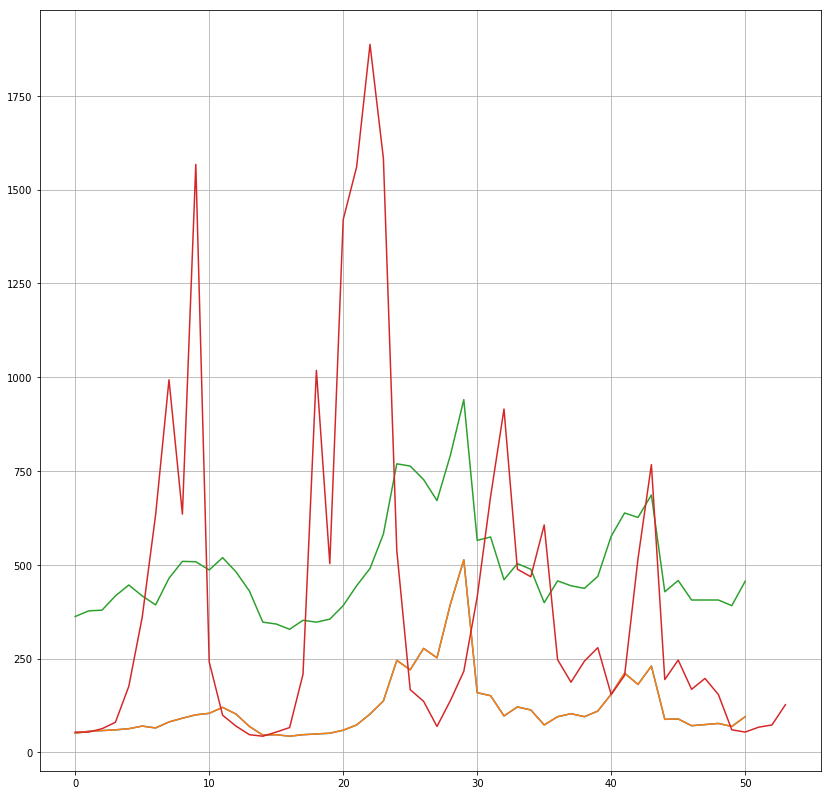

In [42]:
x = np.arange(0, len(run_01))
x_1 = np.arange(0, len(run_04))


#plt.ylim(0, 0.1)
#plt.scatter(x, time_list)
# plt.plot(x, time_list, 'yo', x, fit_fn(x), '--k')
# plt.legend()
fig, ax = plt.subplots(figsize=(14,14))
plt.plot(x, run_01);
plt.plot(x, run_02);
plt.plot(x, run_03);
plt.plot(x_1, run_04);
plt.grid()
plt.show()